In [6]:
# %% Import data
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from matplotlib import cm
import numpy as np



sns.set_style("ticks")

# Test name
test_name = "test-photo-1"
data_folder = Path("..") / "data"
results_df = data_folder / test_name / "results.tsv"
df = pd.read_csv(results_df.resolve(), sep="\t")
# Convert 'duration' and 'real_duration' to datetime format
df["duration"] = pd.to_timedelta(df["duration"])
df["real_duration"] = pd.to_timedelta(df["real_duration"])

# %% Fix since dropped frames not working correctly
# Calculate percentage of dropped frames (Fix because pMV is not doing this correctly)
# df["dropped_frames"] = (df["FPS"] * df["duration"].dt.total_seconds()) - df["recorded_frames"]
df["percent_dropped_frames"] = (df["dropped_frames"] / (df["FPS"] * df["duration"].dt.total_seconds())) * 100

# Default Parameters (The parameters which are fixed if not specificed)
DOWNSAMPLING_FACTOR = 2
CAMERA_UPDATE_RATE = 20
UPDATES_PER_DISPLAY = 1
CRF = 23
ENCODERING_SPEED = "fast"
COMPRESSION_STANDARD = "h265"
N_CAMERAS = 3
FPS = 60


NUMBER_CAMERAS = 6


C:\Users\alifa\AppData\Local\Temp\ipykernel_36412\1876230907.py:48: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  lineplot_downsampling = sns.lineplot(


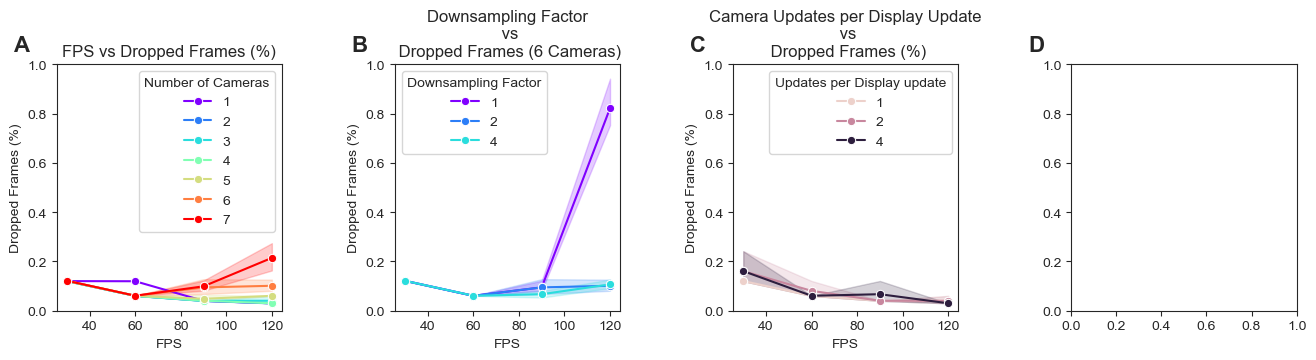

In [8]:
# %% Create a figure
# Figure Title
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(16, 3.2)
testing_parameters = data_folder / test_name / "testing_parameters.json"
with open(testing_parameters.resolve(), "r") as f:
    testing_params = json.load(f)
# Panel Labels
panel_labels = ["A", "B", "C", "D"]
for idx, ax in enumerate(axes):
    ax.text(-0.12, 1.12, panel_labels[idx], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='right')

# Adjust spacing between rows
fig.subplots_adjust(hspace=0.5, wspace=0.5)
# Replace negative percent_dropped_frames with 0 for plotting
# Camera Config Settings
n_cameras_unique = df["experiment_config_n_cameras"].nunique()
rainbow_palette_cameras = [cm.rainbow(i / max(n_cameras_unique - 1, 1)) for i in range(n_cameras_unique)]

# FPS plot with rainbow palette for number of cameras
axes[0].set_title("FPS vs Dropped Frames (%)")
lineplot_fps = sns.lineplot(
    ax=axes[0],
    data=df[
        (df["downsampling_factor"] == DOWNSAMPLING_FACTOR)
        & (df["application_config_gui_config_camera_update_rate"] == CAMERA_UPDATE_RATE)
        & (df["application_config_gui_config_camera_updates_per_display_update"] == UPDATES_PER_DISPLAY)
        & (df["application_config_ffmpeg_config_crf"] == CRF)
        & (df["application_config_ffmpeg_config_encoding_speed"] == ENCODERING_SPEED)
        & (df["application_config_ffmpeg_config_compression_standard"] == COMPRESSION_STANDARD)
    ],
    x="FPS",
    y="percent_dropped_frames",
    hue="experiment_config_n_cameras",
    marker="o",
    legend=True,
    palette=rainbow_palette_cameras,
)
if lineplot_fps.legend_ is not None:
    lineplot_fps.legend_.set_title("Number of Cameras")
axes[0].set_xlabel("FPS")
axes[0].set_ylabel("Dropped Frames (%)")
axes[0].set_ylim(0, 1)
# GUI Settings

axes[1].set_title(f"Downsampling Factor\n vs\n Dropped Frames ({NUMBER_CAMERAS} Cameras)")
lineplot_downsampling = sns.lineplot(
    ax=axes[1],
    data=df[
        (df["experiment_config_n_cameras"] == NUMBER_CAMERAS)
        & (df["application_config_gui_config_camera_update_rate"] == CAMERA_UPDATE_RATE)
        & (df["application_config_gui_config_camera_updates_per_display_update"] == UPDATES_PER_DISPLAY)
        & (df["application_config_ffmpeg_config_crf"] == CRF)
        & (df["application_config_ffmpeg_config_encoding_speed"] == ENCODERING_SPEED)
        & (df["application_config_ffmpeg_config_compression_standard"] == COMPRESSION_STANDARD)
    ],
    x="FPS",
    y="percent_dropped_frames",
    hue="downsampling_factor",
    marker="o",
    legend=True,
    palette=rainbow_palette_cameras,
)
axes[1].set_ylim(0, 1)
if lineplot_downsampling.legend_ is not None:
    lineplot_downsampling.legend_.set_title("Downsampling Factor")
axes[1].set_xlabel("FPS")
axes[1].set_ylabel("Dropped Frames (%)")



axes[2].set_title("Camera Updates per Display Update\n vs\n Dropped Frames (%)")
lineplot_updates_per_display = sns.lineplot(
    ax=axes[2],
    data=df[
        (df["experiment_config_n_cameras"] == N_CAMERAS)
        & (df["downsampling_factor"] == DOWNSAMPLING_FACTOR)
        & (df["application_config_gui_config_camera_update_rate"] == CAMERA_UPDATE_RATE)
        & (df["application_config_ffmpeg_config_crf"] == CRF)
        & (df["application_config_ffmpeg_config_encoding_speed"] == ENCODERING_SPEED)
        & (df["application_config_ffmpeg_config_compression_standard"] == COMPRESSION_STANDARD)
    ],
    x="FPS",
    y="percent_dropped_frames",
    hue="application_config_gui_config_camera_updates_per_display_update",
    marker="o",
    legend=True,
)
if lineplot_updates_per_display.legend_ is not None:
    lineplot_updates_per_display.legend_.set_title("Updates per Display update")
axes[2].set_xlabel("FPS")
axes[2].set_ylabel("Dropped Frames (%)")

axes[2].set_ylim(0, 1)



fig.savefig("performance-figure.png", bbox_inches="tight", dpi=150)

for 4 cameras, how does each downsampling change the number of dropped frames 

For 4 cameras DN = 1, 2, 4

In [3]:
# Check which downsampling_factor values are present for 4 cameras
# Check which FPS values are present for 4 cameras
df[df["experiment_config_n_cameras"] == 4]["FPS"].unique()

array([120,  30,  60,  90])